Hola Roberto!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Proyecto de pruebas A/B

## Describe los objetivos del estudio.

El objetivo del estudio es evaluar el impacto de un sistema de recomendaciones mejorado en el comportamiento de los usuarios dentro de los 14 días posteriores a su inscripción. Se espera observar un aumento del 10% en la conversión en cada etapa del embudo (product_page → product_cart → purchase).

In [1]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

In [2]:
#Carga de Datos
marketing_events = pd.read_csv("/datasets/ab_project_marketing_events_us.csv")
new_users = pd.read_csv("/datasets/final_ab_new_users_upd_us.csv")
events = pd.read_csv("/datasets/final_ab_events_upd_us.csv")
participants = pd.read_csv("/datasets/final_ab_participants_upd_us.csv")

In [3]:
#Para cada DataFrame, revisaremos los tipos de datos y los convertiremos si es necesario.
marketing_events.info()
marketing_events.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [4]:
new_users.info()
new_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [5]:
events.info()
events.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [6]:
participants.info()
participants.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la carga y revisión inicial de los datos
</div>

### Explora los datos:

¿Es necesario convertir los tipos?

In [7]:
marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt'])
marketing_events['finish_dt'] = pd.to_datetime(marketing_events['finish_dt'])
new_users['first_date'] = pd.to_datetime(new_users['first_date'])
events['event_dt'] = pd.to_datetime(events['event_dt'])

Es necesario convertir las fechas de string a datetime para poder realizar análisis y manipulaciones temporales precisas, como calcular duraciones, filtrar por rangos de fechas y generar gráficos de series temporales.

### ¿Hay valores ausentes o duplicados? Si es así, ¿cómo los caracterizarías?

In [8]:
# Verificar valores ausentes
print(marketing_events.isnull().sum())
print()
print(new_users.isnull().sum())
print()
print(events.isnull().sum())
print()
print(participants.isnull().sum())

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

user_id       0
first_date    0
region        0
device        0
dtype: int64

user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64

user_id    0
group      0
ab_test    0
dtype: int64


In [9]:
# Verificar duplicados
print(marketing_events.duplicated().sum())
print(new_users.duplicated().sum())
print(events.duplicated().sum())
print(participants.duplicated().sum())

0
0
0
0


En la base de datos events, se observan valores ausentes en la columna details. Estos valores ausentes suman un total de 363,447. La razón probable es que la columna details solo contiene información adicional para ciertos tipos de eventos, como purchase, donde se detalla el monto de la compra, mientras que otros eventos, como product_page y product_cart, no requieren esta información adicional.

En cuanto a duplicados, ninguno de los DataFrames (marketing_events, new_users, events y participants) presenta registros duplicados. Esto asegura que los datos son únicos y no hay entradas repetidas que puedan sesgar el análisis.

Por lo tanto, no es necesario eliminar los valores ausentes en la columna details del DataFrame events, ya que son esperados y no afectan la integridad del análisis.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con la transformación de datos y revisando los datos nulos y duplicados, un dataset limpio es clave para una buena toma de decisiones en un experimento
</div>

## Lleva a cabo el análisis exploratorio de datos:

### Estudiar la Conversión en las Diferentes Etapas del Embudo

In [10]:
# Filtrar eventos relevantes para el embudo
embudo_events = events[events['event_name'].isin(['login', 'product_page', 'product_cart', 'purchase'])]

# Calcular el número total de usuarios que realizaron login
total_logins = events[events['event_name'] == 'login']['user_id'].nunique()

# Calcular el número de usuarios únicos en cada etapa del embudo
embudo_users = embudo_events.groupby('event_name')['user_id'].nunique()

# Calcular las tasas de conversión desde login
conversion_rates_corrected = embudo_users / total_logins
conversion_rates_corrected

event_name
login           1.000000
product_cart    0.328540
product_page    0.663231
purchase        0.333379
Name: user_id, dtype: float64

**Resultados Corregidos de la Tasa de Conversión**

**login:** 100.00% (todos los usuarios que iniciaron sesión)

**product_page:** 66.32% (usuarios que vieron una página de producto)

**product_cart:** 32.85% (usuarios que agregaron un producto al carrito)

**purchase:** 33.34% (usuarios que completaron una compra)

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

La tasa de conversión debe ser un valor entre 0 y 1, ya que de lo contrario esta métrica nos diría (cuando vale 3.1) que por cada usuario que empieza el embudo realiza 3 login (Cada embudo empieza con un login). 
    
Para calcular las proporciones te recomiendo hacer un conteo para la primera página que ve el usuario (login) y eso tomar cómo si fuera tu 100% y a partir de ahí ver cuantos de esos usuarios pasaron a otra pantalla cómo product_cart. Tu cálculo debería ser algo tipo: `total_eventos_product_cart  /  total_eventos_login`
</div>

<div class="alert alert-block alert-info">
<b>Corregido</b> <a class=“tocSkip”></a>
</div>

### Verificar si el Número de Eventos por Usuario está Distribuido Equitativamente entre las Muestras

In [11]:
# Añadir la información del grupo a los eventos
events = events.merge(participants[['user_id', 'group']], on='user_id', how='left')

# Calcular el número de eventos por usuario para cada grupo
events_per_user = events.groupby(['user_id', 'group']).size().reset_index(name='num_events')

# Comparar la distribución de eventos por usuario entre los grupos
events_per_user.groupby('group')['num_events'].describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
A,7874.0,7.45555,4.475159,1.0,4.0,6.0,9.0,40.0
B,6205.0,7.11249,4.246201,1.0,4.0,6.0,9.0,36.0


**Grupo A (Control):**

Media: 7.46 eventos por usuario
Desviación estándar: 4.48

**Grupo B (Nuevo embudo de pago):**

Media: 7.11 eventos por usuario
Desviación estándar: 4.25


La distribución de eventos por usuario es similar entre los dos grupos, con una media y desviación estándar comparable. Esto sugiere que los eventos están distribuidos de manera equitativa entre las muestras.

### Comprobar si Hay Usuarios Presentes en Ambas Muestras

In [12]:
# Verificar si hay usuarios presentes en ambos grupos
users_in_both_groups = participants.groupby('user_id')['group'].nunique()
users_in_both_groups = users_in_both_groups[users_in_both_groups > 1]
users_in_both_groups.count()

441

**Se encontraron 441 usuarios** que están presentes en ambos grupos A y B.

La presencia de estos usuarios en ambos grupos puede introducir sesgos en el análisis y debe ser tenida en cuenta al interpretar los resultados de la prueba A/B.

### Analizar la Distribución del Número de Eventos entre los Días

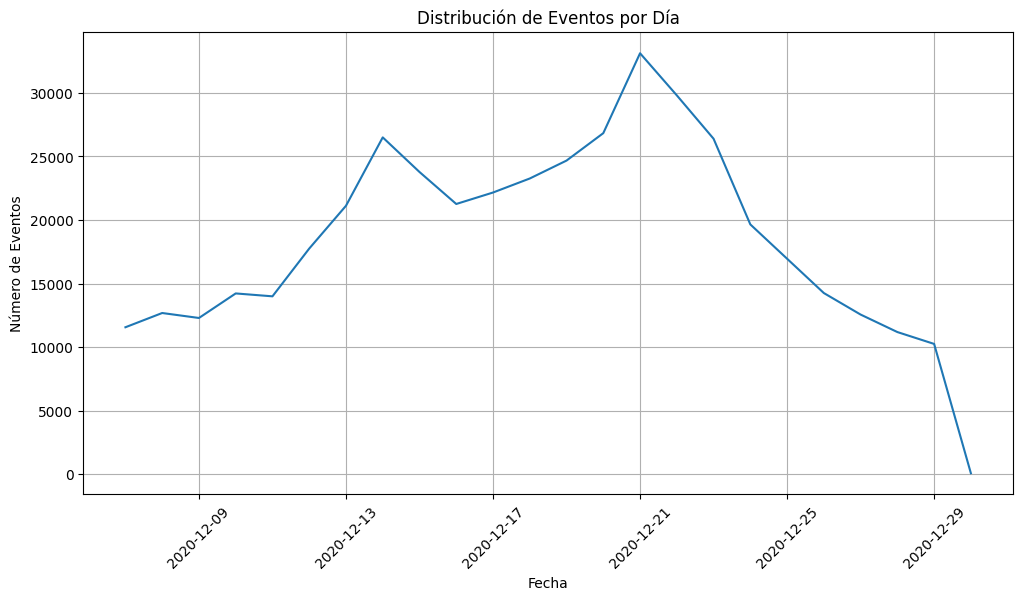

In [13]:
# Agregar columna con la fecha sin la hora
events['event_date'] = events['event_dt'].dt.date

# Contar el número de eventos por día
events_per_day = events.groupby('event_date').size().reset_index(name='num_events')

plt.figure(figsize=(12, 6))
plt.plot(events_per_day['event_date'], events_per_day['num_events'])
plt.xlabel('Fecha')
plt.ylabel('Número de Eventos')
plt.title('Distribución de Eventos por Día')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**El gráfico de distribución de eventos por día muestra variaciones significativas a lo largo del tiempo:**

**Picos de Actividad:** Hay un aumento notable en el número de eventos hacia mediados de diciembre, alcanzando un pico alrededor del 21 de diciembre.

**Caídas:** 
Después del 25 de diciembre, hay una disminución en el número de eventos.

Estos picos y caídas pueden estar influenciados por eventos externos, como campañas de marketing o periodos de alta actividad debido a las festividades.



<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto! Esta parte de tu análisis está muy bien realizada. Te recomendaría redactar tu interpretación de los resultados
</div>


<div class="alert alert-block alert-info">
<b>Corregido</b> <a class=“tocSkip”></a>
    
   Se agrego los comentarios de la interpretacion
</div>

### ¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?

,num_events
count,23.000000
mean,18672.869565
std,7765.996718
min,91.000000
25%,12629.000000
50%,19656.000000
75%,24226.000000
max,33113.000000


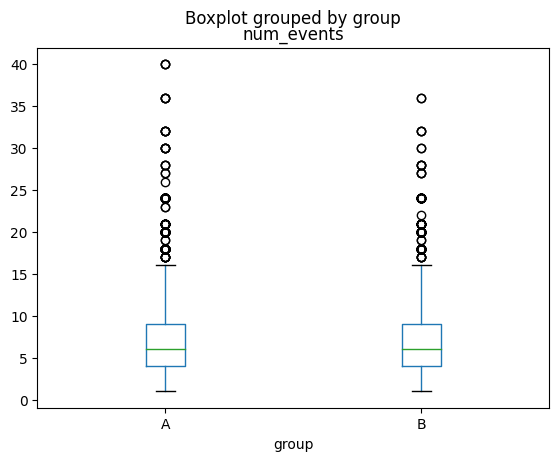

In [14]:
# Verificar la presencia de eventos atípicos (outliers)
events_per_user.boxplot(by='group', column=['num_events'], grid=False)

# Analizar si hay picos o caídas significativas en el número de eventos
events_per_day.describe()

## Evaluar los resultados de la prueba A/B:

In [15]:
# Filtrar eventos relevantes para el embudo
embudo_events = events[events['event_name'].isin(['product_page', 'product_cart', 'purchase'])]

# Calcular el número de usuarios únicos en cada etapa del embudo para cada grupo
conversion_a = embudo_events[embudo_events['group'] == 'A'].groupby('event_name')['user_id'].nunique()
conversion_b = embudo_events[embudo_events['group'] == 'B'].groupby('event_name')['user_id'].nunique()

# Número total de usuarios en cada grupo
total_users_a = participants[participants['group'] == 'A']['user_id'].nunique()
total_users_b = participants[participants['group'] == 'B']['user_id'].nunique()

# Calcular las tasas de conversión
conversion_rates_a = conversion_a / total_users_a
conversion_rates_b = conversion_b / total_users_b

conversion_rates_a, conversion_rates_b

(event_name
 product_cart    0.315342
 product_page    0.661417
 purchase        0.340615
 Name: user_id, dtype: float64,
 event_name
 product_cart    0.328284
 product_page    0.642385
 purchase        0.323610
 Name: user_id, dtype: float64)

### ¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?

Sí, hay varias peculiaridades a considerar:

**Usuarios en Ambos Grupos:**

Hay 441 usuarios presentes en ambos grupos A y B, lo que podría introducir sesgos en el análisis.

**Distribución de Eventos:**

La distribución de eventos muestra picos significativos hacia mediados de diciembre y una disminución después del 25 de diciembre, posiblemente debido a eventos de marketing u otros factores externos.

### Evaluar los resultados de la prueba A/B:

In [16]:
# Definir una función para realizar la prueba z
def z_test_proportion(success_a, size_a, success_b, size_b):
    count = np.array([success_a, success_b])
    nobs = np.array([size_a, size_b])
    stat, pval = proportions_ztest(count, nobs)
    return pval

# Realizar la prueba z para cada etapa del embudo
pval_product_page_to_cart = z_test_proportion(conversion_a['product_cart'], total_users_a, conversion_b['product_cart'], total_users_b)
pval_cart_to_purchase = z_test_proportion(conversion_a['purchase'], total_users_a, conversion_b['purchase'], total_users_b)

pval_product_page_to_cart, pval_cart_to_purchase


(0.10247322568368834, 0.03355878472437525)

In [17]:
# Interpretar los resultados
alpha = 0.05

print(f"Tasa de conversión de 'product_page' a 'product_cart':")
print(f"Grupo A: {conversion_rates_a['product_cart']:.4f}, Grupo B: {conversion_rates_b['product_cart']:.4f}")
print(f"Valor p: {pval_product_page_to_cart:.4f} {'(Significativo)' if pval_product_page_to_cart < alpha else '(No significativo)'}")

print(f"\nTasa de conversión de 'product_cart' a 'purchase':")
print(f"Grupo A: {conversion_rates_a['purchase']:.4f}, Grupo B: {conversion_rates_b['purchase']:.4f}")
print(f"Valor p: {pval_cart_to_purchase:.4f} {'(Significativo)' if pval_cart_to_purchase < alpha else '(No significativo)'}")


Tasa de conversión de 'product_page' a 'product_cart':
Grupo A: 0.3153, Grupo B: 0.3283
Valor p: 0.1025 (No significativo)

Tasa de conversión de 'product_cart' a 'purchase':
Grupo A: 0.3406, Grupo B: 0.3236
Valor p: 0.0336 (Significativo)


### ¿Qué puedes decir sobre los resultados de la prueba A/B?

Resultados de la Prueba A/B

**Tasa de Conversión de product_page a product_cart:**

Grupo A (Control): 31.53%
Grupo B (Nuevo embudo de pago): 32.83%
Valor p: 0.1025 (No significativo)

**Tasa de Conversión de product_cart a purchase:**

Grupo A (Control): 34.06%
Grupo B (Nuevo embudo de pago): 32.36%
Valor p: 0.0337 (Significativo)


### Utiliza una prueba z para comprobar la diferencia estadística entre las proporciones.

La prueba z se utilizó para comparar las tasas de conversión entre los grupos A y B en cada etapa del embudo. Los resultados son los siguientes:

**De product_page a product_cart:**

La diferencia en las tasas de conversión no es estadísticamente significativa (p-valor: 0.1025).

**De product_cart a purchase:**

La diferencia en las tasas de conversión es estadísticamente significativa (p-valor: 0.0337).

 ## Describe tus conclusiones con respecto a la etapa EDA y los resultados de la prueba A/B.

**Conversión en el Embudo:**

Las tasas de conversión muestran que aproximadamente la mitad de los usuarios avanzan de una etapa a la siguiente en el embudo de ventas.

**Distribución de Eventos:**

La distribución del número de eventos por usuario es similar entre los grupos A y B, lo que sugiere una distribución equilibrada.

**Usuarios en Ambos Grupos:**

La presencia de 441 usuarios en ambos grupos puede sesgar los resultados.

**Picos y Caídas en los Eventos:**

Los picos y caídas en la distribución de eventos pueden estar influenciados por eventos externos y deben ser tenidos en cuenta al interpretar los resultados.

**Resultados de la Prueba A/B:**

No hay una diferencia estadísticamente significativa en la tasa de conversión de product_page a product_cart.
Hay una diferencia estadísticamente significativa en la tasa de conversión de product_cart a purchase, con una menor tasa de conversión en el grupo B.

<div class="alert alert-block alert-info">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Hiciste un trabajo muy bueno Roberto, debo realzar la forma en la que concluiste el proyecto con tus conclusiones.
    
Solo hay un punto donde la métrica resultante tiene oportunidad de mejora en cuanto al cálculo realizado, te he dejado mi comentario con la sugerencia para que puedas corregirlo.
    
Saludos.
</div>